In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

import networkx as nx

from ipysigma import Sigma

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
url_df = pd.read_csv("./clean_data/fake_url_COVID-19_20_05_2020.csv")

# Top 10 claim

In [3]:
top10 = url_df["Item reviewed"].value_counts().head(10).to_frame()
top10['claim'] = top10.index
top10 = top10.rename(columns={'Item reviewed': 'appearance_number'})
top10[['claim', 'appearance_number']].style.hide_index()

claim,appearance_number
Plandemic: Part 1,98
this new coronavirus came from a recombination event. That is a cutting and pasting of two different viruses.,59
Wuhan coronavirus was man-made and patented in 2015,41
The evidence points to SARS-CoV-2 research being carried out at the Wuhan Institute of Virology,39
"""Testing People for Any Strain of a Coronavirus, Not Specifically for COVID-19""",39
Fauci knew of chloroquine treatment,38
Wuhan Coronavirus outbreak linked to eating bats,38
"""Coronavirus Contains """"HIV Insertions"""", Stoking Fears Over Artificially Created Bioweapon""",34
this coronavirus genome contained sequences of another virus […] the HIV virus (AIDS virus),34
Breaking Now: Scientists Confirm Coronavirus Man-Made…Contains ‘pShuttle-SN’ Sequence Proving Laboratory Origin,32


# Propagation network

In [4]:
def vizualise_simple_network(claim_beginning):
    sample_url = url_df[url_df["Item reviewed"].str.startswith(claim_beginning)]
    claim = url_df[url_df["Item reviewed"].str.startswith(claim_beginning)]['Item reviewed'].unique()[0]

    G=nx.Graph()
    G.add_node(claim, color="#0F0", size=20)
    G.add_nodes_from(list(sample_url['url'].unique()), color="#55F", size=5)

    G.add_edges_from(list(sample_url[['Item reviewed', 'url']].itertuples(index=False, name=None)))
    
    return G

In [5]:
G = vizualise_simple_network("Plandemic")
Sigma(G)

Sigma(data={'nodes': [('Plandemic: Part 1', {'color': '#0F0', 'size': 20}), ('https://youtube.com/watch?v=EK-P…

# After a Facebook collect: propagation network

In [6]:
posts_df = pd.read_csv("./clean_data/fake_posts_COVID-19_20_05_2020.csv")

In [15]:
def vizualise_network(claim_beginning):
    sample_url = url_df[url_df["Item reviewed"].str.startswith(claim_beginning)]
    claim = url_df[url_df["Item reviewed"].str.startswith(claim_beginning)]['Item reviewed'].unique()[0]

    sample_posts = posts_df[posts_df["url"].isin(sample_url['url'].unique())]

    G=nx.Graph()
    G.add_node(claim, color="#0F0", size=20)
    G.add_nodes_from(list(sample_url['url'].unique()), color="#55F", size=5)
    G.add_nodes_from(list(sample_posts['account_name'].unique()), color="#F00", size=2)

    G.add_edges_from(list(sample_url[['Item reviewed', 'url']].itertuples(index=False, name=None)))
    G.add_edges_from(list(sample_posts[['account_name', 'url']].itertuples(index=False, name=None)))
    
    return G

In [29]:
    claim_beginning="Plandemic"
    
    sample_url = url_df[url_df["Item reviewed"].str.startswith(claim_beginning)]
    claim = url_df[url_df["Item reviewed"].str.startswith(claim_beginning)]['Item reviewed'].unique()[0]
    
    sample_posts = posts_df[posts_df["url"].isin(sample_url['url'].unique())]

    sample_posts = sample_posts[["url", "account_name", "account_id", "account_subscriber_count"]]
    sample_posts = sample_posts.drop_duplicates(subset=['account_id'])
    sample_posts = sample_posts.dropna(subset=['account_id'])

In [30]:
sample_posts['account_id'].isna().sum()

0

KeyError: "['account_idaccount_subscriber_count'] not in index"

In [8]:
G = vizualise_network("Plandemic")
Sigma(G)

Sigma(data={'nodes': [('Plandemic: Part 1', {'color': '#0F0', 'size': 20}), ('https://youtube.com/watch?v=EK-P…

In [9]:
G = vizualise_network("Wuhan coronavirus was man-made")
Sigma(G)

Sigma(data={'nodes': [('Wuhan coronavirus was man-made and patented in 2015', {'color': '#0F0', 'size': 20}), …

# After a Facebook collect: virality dynamics

In [10]:
posts_df['date']= pd.to_datetime(posts_df['date']) 
posts_df = posts_df[posts_df['date'] >= "2020-05-01"]

posts_df["reaction"] = posts_df[["actual_like_count", "actual_favorite_count", "actual_love_count",
   "actual_wow_count", "actual_haha_count", "actual_sad_count",
   "actual_angry_count", "actual_thankful_count"]].sum(axis=1).astype(int)

In [11]:
def plot_virality(url_df, posts_df, claim_beginning):
    
    sample_url = url_df[url_df["Item reviewed"].str.startswith(claim_beginning)]
    claim = url_df[url_df["Item reviewed"].str.startswith(claim_beginning)]['Item reviewed'].unique()[0]
    
    fig, ax1 = plt.subplots(figsize=(12, 4))
    
    ax1.plot(posts_df[posts_df["url"].isin(sample_url['url'].unique())]\
        ["date"].value_counts().sort_index(), 'r', label="posts")
    
    ax1.tick_params(axis='y', labelcolor='r')
    ax1.legend(loc='upper left')
    ax1.set_title(claim)
    
    ax2 = ax1.twinx()
    
    ax2.plot(posts_df[posts_df["url"].isin(sample_url['url'].unique())]\
        .groupby(by=["date"])["reaction"].sum(), label='reactions')
    ax2.plot(posts_df[posts_df["url"].isin(sample_url['url'].unique())]\
        .groupby(by=["date"])["actual_comment_count"].sum(), label='comments')
    ax2.plot(posts_df[posts_df["url"].isin(sample_url['url'].unique())]\
        .groupby(by=["date"])["actual_share_count"].sum(), label='shares')

    ax2.tick_params(axis='y', labelcolor='#1f77b4')
    
    ax2.set_xlim(np.datetime64('2020-05-04'), np.datetime64('2020-05-20'))
    ax2.legend(loc='upper right')
    
    plt.tight_layout()

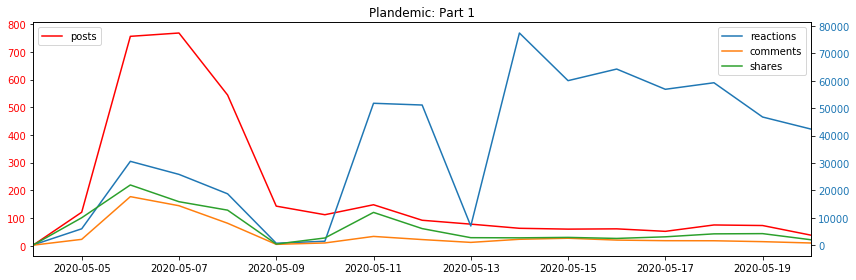

In [12]:
plot_virality(url_df, posts_df, "Plandemic")
plt.savefig("./figure/plandemic_virality.png")

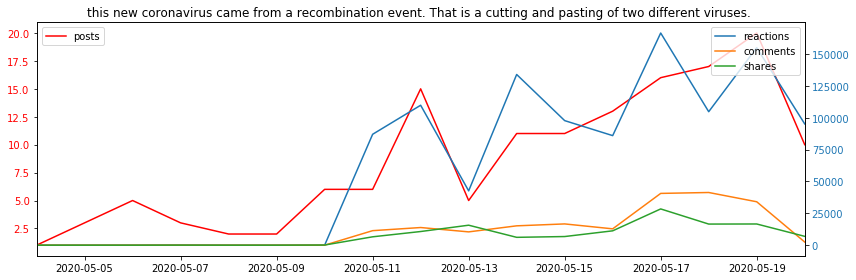

In [13]:
plot_virality(url_df, posts_df, "this new coronavirus came from a recombination event.")